# <font color=yellow> **Predicting Hospital Readmission Using a Simple Machine Learning Model**

# **Business Context :**
> You are tasked with predicting whether a patient is likely to be readmitted to the hospital within 30 days based on historical patient data.

# **Import important tools/libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
df = pd.read_csv(r"hospital_readmissions.csv")

# Preview top 5 rows data
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


# <font color=red> Data pre-processing(Preparing data for modeling)

In [7]:
# Record of the data
df.shape

(25000, 17)

In [8]:
# Count the null value
df.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [9]:
# Count the duplicated value
df.duplicated().sum()

0

### - Spliting my data into x and y

In [11]:
print("Showing all the columns : \n\n", df.columns)

Showing all the columns : 

 Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')


In [12]:
## Getting x
x = df[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med']]

In [13]:
# Getting y
y = df['readmitted']
y

0         no
1         no
2        yes
3        yes
4         no
        ... 
24995    yes
24996    yes
24997    yes
24998     no
24999    yes
Name: readmitted, Length: 25000, dtype: object

<h1><center> Label Encoder </center></h1>

###  *Label Encoding of my y column*

In [15]:
# Importing
from sklearn.preprocessing import LabelEncoder

In [16]:
# Initialising
encoder = LabelEncoder()

In [17]:
# Fit 
encoder.fit(y)

LabelEncoder()

In [18]:
# Tranform & Storing the output
y_encoded = encoder.transform(y)
y_encoded

array([0, 0, 1, ..., 1, 0, 1])

#### The way this encoder works

In [20]:
encoder.transform(['no'])

array([0])

In [21]:
encoder.transform(['yes'])

array([1])

### We need to fix our x

>   - We need to convert our categorical columns to numbers somehow
>   - We can use One hot encoder or Label Encoder

In [23]:
x

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes


### Using one-hot encoding 
> use : ```pd.get_dummies()```

In [25]:
x_cat = df[["age", "medical_specialty", "diag_1", "diag_2", "diag_3", "glucose_test", "A1Ctest", "change", "diabetes_med"]]
x_cat

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med
0,[70-80),Missing,Circulatory,Respiratory,Other,no,no,no,yes
1,[70-80),Other,Other,Other,Other,no,no,no,yes
2,[50-60),Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes
3,[70-80),Missing,Circulatory,Other,Diabetes,no,no,yes,yes
4,[60-70),InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes
...,...,...,...,...,...,...,...,...,...
24995,[80-90),Missing,Circulatory,Other,Circulatory,no,normal,no,no
24996,[80-90),Missing,Digestive,Injury,Other,no,high,yes,yes
24997,[70-80),Missing,Other,Other,Other,normal,no,no,no
24998,[70-80),Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes


In [26]:
x_num = df[["time_in_hospital", "n_lab_procedures", "n_procedures", "n_medications", "n_outpatient", "n_inpatient", "n_emergency"]]
x_num

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
0,8,72,1,18,2,0,0
1,3,34,2,13,0,0,0
2,5,45,0,18,0,0,0
3,2,36,0,12,1,0,0
4,1,42,0,7,0,0,0
...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0
24996,2,66,0,24,0,0,0
24997,5,12,0,6,0,1,0
24998,2,61,3,15,0,0,0


<h1><center> One-Hot-Encoder </center></h1>

In [28]:
# Encode the categorical column
x_cat_encoded = pd.get_dummies(x_cat)

In [29]:
x_cat_encoded

,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,...,glucose_test_high,glucose_test_no,glucose_test_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal,change_no,change_yes,diabetes_med_no,diabetes_med_yes
0,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,True
2,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,True
3,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,True
4,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
24996,False,False,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,True
24997,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
24998,False,False,False,True,False,False,False,False,True,False,...,False,True,False,False,True,False,False,True,False,True


### Now, Join our encoded columns along with the numerical columns

- We are going to use something called ```pd.concat```
- For joining sideways, do ```axis=1```, else use ```axis=0```

In [31]:
x_final = pd.concat([x_num, x_cat_encoded], axis=1)

In [32]:
x_final

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,age_[40-50),age_[50-60),age_[60-70),...,glucose_test_high,glucose_test_no,glucose_test_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal,change_no,change_yes,diabetes_med_no,diabetes_med_yes
0,8,72,1,18,2,0,0,False,False,False,...,False,True,False,False,True,False,True,False,False,True
1,3,34,2,13,0,0,0,False,False,False,...,False,True,False,False,True,False,True,False,False,True
2,5,45,0,18,0,0,0,False,True,False,...,False,True,False,False,True,False,False,True,False,True
3,2,36,0,12,1,0,0,False,False,False,...,False,True,False,False,True,False,False,True,False,True
4,1,42,0,7,0,0,0,False,False,True,...,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,False,False,False,...,False,True,False,False,False,True,True,False,True,False
24996,2,66,0,24,0,0,0,False,False,False,...,False,True,False,True,False,False,False,True,False,True
24997,5,12,0,6,0,1,0,False,False,False,...,False,False,True,False,True,False,True,False,True,False
24998,2,61,3,15,0,0,0,False,False,False,...,False,True,False,False,True,False,False,True,False,True


<h1><center> Model Building and Evaluations </center></h1>

In [34]:
# Import train-test scikit learn
from sklearn.model_selection import train_test_split

In [35]:
# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(x_final,y_encoded,train_size=0.7,random_state=42)

In [36]:
X_train

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,age_[40-50),age_[50-60),age_[60-70),...,glucose_test_high,glucose_test_no,glucose_test_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal,change_no,change_yes,diabetes_med_no,diabetes_med_yes
4913,9,66,1,27,0,0,0,False,True,False,...,False,True,False,False,False,True,False,True,False,True
9338,2,39,1,10,0,1,0,False,False,False,...,False,True,False,False,True,False,True,False,True,False
24211,1,23,0,3,0,0,0,False,False,True,...,False,True,False,True,False,False,False,True,False,True
18791,5,54,4,21,0,0,0,False,False,False,...,False,True,False,False,False,True,True,False,False,True
16066,4,54,0,9,0,1,0,False,False,True,...,False,True,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,7,44,0,27,4,3,0,False,False,True,...,False,True,False,False,True,False,True,False,True,False
5390,4,62,0,33,0,2,0,False,True,False,...,False,True,False,False,True,False,False,True,False,True
860,3,13,1,32,0,0,0,False,False,False,...,False,True,False,False,True,False,False,True,False,True
15795,8,58,4,18,0,0,0,False,False,True,...,False,True,False,True,False,False,False,True,False,True


In [37]:
y_train

array([0, 1, 0, ..., 0, 0, 1])

##### Let's Train

### Model Training 

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
# Import 
from sklearn.linear_model import LogisticRegression

In [41]:
# Initialise
model = LogisticRegression()

In [42]:
# Fitting my model
model.fit(X_train,y_train)

LogisticRegression()

### Before i start predicting, what is the ```intercept``` and ```slopes```
> - ``intercept_`` gives us the Y-intercept of the regression line.
> - ``coef_`` gives us the slope of the line for each independent variable.
>  > - Using the fitting method of the model to train it on this data, and then access these attributes to understand the model parameters.

In [44]:
model.intercept_

array([-0.25245656])

In [45]:
model.coef_

array([[ 0.02052601,  0.00127523, -0.04437567,  0.00270156,  0.1179549 ,
         0.38389501,  0.22337097, -0.15163847, -0.11558649,  0.04710653,
         0.05167977,  0.10958297, -0.19202686,  0.03179787,  0.05320056,
         0.06457891, -0.11481335,  0.04178293, -0.1104272 , -0.21700227,
         0.02908906,  0.17057398, -0.01722685, -0.14891209,  0.00115017,
        -0.12126834, -0.13334384, -0.03094462,  0.0663526 , -0.01155782,
        -0.09417884, -0.10937635, -0.01102995,  0.01212641, -0.04759704,
        -0.05562154,  0.06045773, -0.00590647,  0.09183673, -0.1139482 ,
        -0.12958684, -0.07200578, -0.05444637, -0.02728334, -0.10694387,
        -0.06487641, -0.07906225, -0.05671099,  0.035976  , -0.23014754,
        -0.14151318, -0.10936936, -0.25404053,  0.00315799]])

## Predicting

In [47]:
model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1])

In [48]:
y_test

array([1, 0, 0, ..., 1, 1, 0])

## Metrics for evaluating the model

In [179]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [183]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [185]:
# Predicting the readmission for the test value
y_pred = lr.predict(X_test)

In [195]:
x_range = [i for i in range(len(y_test))]

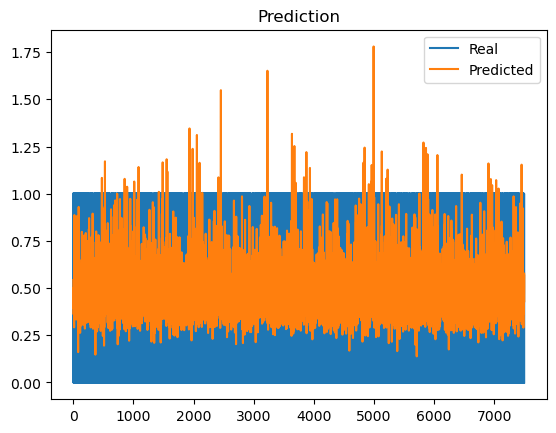

In [199]:

plt.title('Prediction')

plt.plot(x_range,y_test)
plt.plot(x_range,y_pred)

# Function add a legend  
plt.legend(["Real", "Predicted"])

In [201]:
# calculate Mean square error
mean_squared_error(y_test,y_pred)

0.23358276804764683

In [203]:
mse = mean_squared_error(y_test,y_pred)

In [205]:
# Calculate R square vale
r2_score(y_test,y_pred)

0.06149780695141893

In [207]:
rsq = r2_score(y_test,y_pred)

In [209]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 0.23358276804764683
r square : 0.06149780695141893


In [211]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 0.3036516632850465
Coefficient of the line: [ 4.78163636e-03  3.15103735e-04 -1.13568934e-02  7.37749788e-04
  2.61013769e-02  7.82770289e-02  2.49290280e-02 -1.82686966e-02
 -1.74316363e-02  2.02520486e-02  2.23058196e-02  3.60050831e-02
 -4.28626185e-02  1.28008025e-02  1.97495371e-02  2.23656632e-02
 -1.62606043e-02  2.03200864e-02 -1.57480883e-02 -4.32273966e-02
  1.16813651e-02  4.20776618e-02  8.07787030e-05 -2.28680982e-02
  3.13278363e-02 -2.96989177e-02 -2.66431467e-02 -5.95747927e-03
  2.08945598e-02  4.11509234e-03 -2.08796869e-02 -2.66382375e-02
  1.00278228e-02  1.97797717e-02 -3.44728260e-03 -3.85203965e-03
  3.32046431e-02  1.64117661e-02  4.94242738e-02 -2.28912221e-02
 -9.26739852e-02 -1.06824629e-02  8.15228774e-03  1.90546996e-02
 -7.92427878e-03 -8.07419411e-07  7.92508620e-03  3.42777641e-03
  2.70334126e-02 -3.04611890e-02 -5.23814539e-03  5.23814539e-03
 -3.00087052e-02  3.00087052e-02]


- After summarising all these steps then we can say this the bad model predicted.

In [213]:
y_test_predictions = model.predict(X_test)
y_test_predictions

array([1, 0, 0, ..., 1, 0, 1])

<h1><center> Accuracy </center></h1>

In [52]:
# Import
from sklearn.metrics import accuracy_score

In [53]:
# This is my testing accuracy
accuracy_score(y_test,y_test_predictions)

0.6077333333333333

In [54]:
y_train_predictions = model.predict(X_train)
y_train_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
y_train

array([0, 1, 0, ..., 0, 0, 1])

In [56]:
# This is my training accuracy
accuracy_score(y_train,y_train_predictions)

0.6125142857142857

<h1><center> Confusion Matrix </center></h1>

In [58]:
# Import 
from sklearn.metrics import confusion_matrix

## For Training

In [60]:
# Trying it out
confusion_matrix(y_train, y_train_predictions)

array([[7231, 2015],
       [4766, 3488]], dtype=int64)

In [61]:
# Storing inside a variable
cm = confusion_matrix(y_train, y_train_predictions)

### Plot this confusion matrix 

<Axes: >

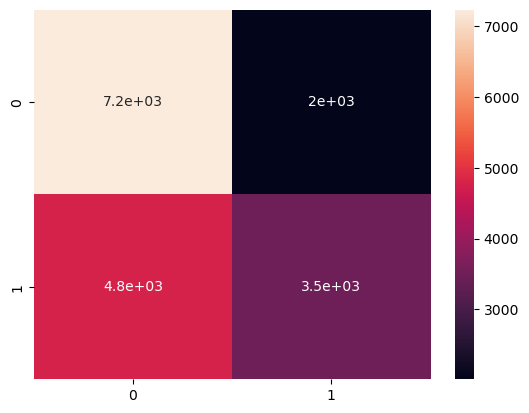

In [63]:
sns.heatmap(cm, annot=True)

## For Testing

In [65]:
# Trying it out
confusion_matrix(y_test, y_test_predictions)

array([[3104,  896],
       [2046, 1454]], dtype=int64)

In [66]:
# Storing inside a variable
cm = confusion_matrix(y_test, y_test_predictions)

### Plotting this confusion matrix

<Axes: >

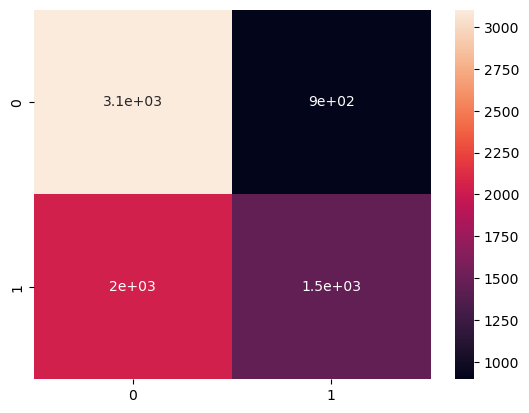

In [68]:
sns.heatmap(cm, annot=True)

# Confusion matrix for your reference

In [70]:
import numpy as np
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

In [71]:
labels

array([['True Neg', 'False Pos'],
       ['False Neg', 'True Pos']], dtype='<U9')

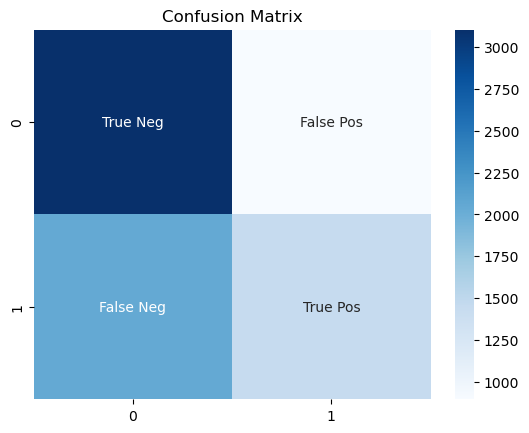

In [72]:
ax = plt.axes()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax = ax)
ax.set_title('Confusion Matrix')
plt.show()

## Precision 
Of all the Positive my model predicted, how many were actually readmitted ??

>**Interpretation:** "Of all the instances that the model predicted as positive, how many were actually readmitted?" It measures the accuracy of positive predictions. A high precision indicates that the model has a low false-positive rate.

In [74]:
# Import
from sklearn.metrics import precision_score

### For training

In [76]:
precision_score(y_train,y_train_predictions)

0.6338360894057786

### For testing

In [78]:
precision_score(y_test,y_test_predictions)

0.6187234042553191

## Recall
Of all the people that should have readmitted, how many did my model give to ?

In [80]:
# Import
from sklearn.metrics import recall_score

### For training

In [82]:
recall_score(y_train,y_train_predictions)

0.4225829900654228

### For testing

In [84]:
recall_score(y_test,y_test_predictions)

0.4154285714285714

## F1 Score
```2 * (precision * recall) / (precision + recall)```
-  It provides a single metric that balances precision and recall.
-  The F1 score is a good overall metric when you need to balance precision and recall.

In [86]:
from sklearn.metrics import f1_score

### For training

In [88]:
f1_score(y_train,y_train_predictions)

0.5070873010103947

### For testing

In [90]:
f1_score(y_test,y_test_predictions)

0.49709401709401707

## Classification report

In [92]:
from sklearn.metrics import classification_report

# Print the classification report for testing
print(classification_report(y_test,y_test_predictions))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68      4000
           1       0.62      0.42      0.50      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.59      7500
weighted avg       0.61      0.61      0.59      7500



In [93]:
# Print the classification report for training
print(classification_report(y_train,y_train_predictions))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68      9246
           1       0.63      0.42      0.51      8254

    accuracy                           0.61     17500
   macro avg       0.62      0.60      0.59     17500
weighted avg       0.62      0.61      0.60     17500



### Model testing for class 1 :
- **Precision for class 1 (readmission): 0.62 –** Out of all predicted readmissions, 62% were actual readmissions.
- **Recall for class 1 (readmission): 0.41 –** The model identified 41% of all actual readmissions.
- **F1 score for class 1: 0.50 –** The F1 score balances both precision and recall, showing overall model performance for readmissions.

### Model training for class 1 :
- **Precision for class 1 (readmission): 0.64 –** Out of all predicted readmissions, 64% were actual readmissions.
- **Recall for class 1 (readmission): 0.42 –** The model identified 42% of all actual readmissions.
- **F1 score for class 1: 0.51 –** The F1 score balances both precision and recall, showing overall model performance for readmissions.